In [45]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Наложение и удаление шума

In [46]:
image = cv2.imread('sar_1.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 

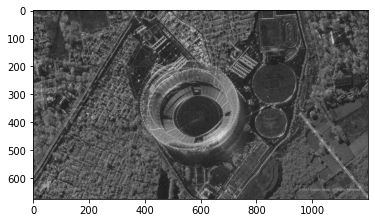

In [47]:
plt.imshow(image_gray, cmap="gray")

In [81]:
# Gaussian noise
mean = 0
stddev = 100
noise_gauss = np.zeros(image_gray.shape, np.uint8)
cv2.randn(noise_gauss, mean, stddev)

array([[229,   0,   0, ...,   0,   0,   0],
       [126,  68,   0, ...,   0,   0,  32],
       [162,  11,   6, ...,  13,  50,   0],
       ...,
       [  0,   6, 141, ...,   0,   0, 105],
       [ 26,   0,   0, ...,  54,  99,   0],
       [ 30,   0,  14, ...,   0,  84,   0]], dtype=uint8)

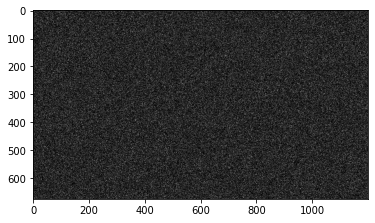

In [82]:
plt.imshow(noise_gauss, cmap="gray")

In [83]:
# Salt and pepper
noise =  np.random.randint(0, 101, size = (image_gray.shape[0], image_gray.shape[1]), dtype=int)
zeros_pixel = np.where(noise == 0)
ones_pixel = np.where(noise == 100)

In [84]:
bg_image = np.ones(image_gray.shape, np.uint8) * 128

In [85]:
bg_image[zeros_pixel] = 0
bg_image[ones_pixel] = 255

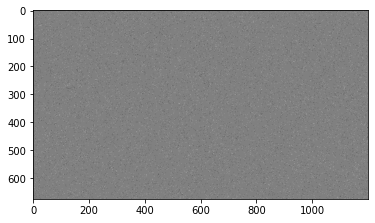

In [86]:
plt.imshow(bg_image, cmap="gray")

In [87]:
image_noise_gauss = cv2.add(image_gray,noise_gauss)

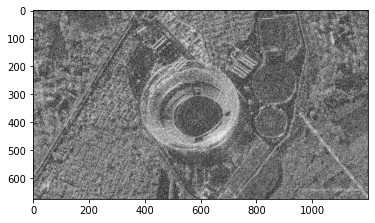

In [88]:
plt.imshow(image_noise_gauss, cmap="gray")

In [89]:
from skimage.metrics import structural_similarity, mean_squared_error
mse_gauss = mean_squared_error(image_gray, image_noise_gauss)
(ssim, diff) = structural_similarity(image_gray, image_noise_gauss, full=True)
print(mse_gauss, ssim)

4239.23434691358 0.18694949978788222


In [90]:
image_gauss_median = cv2.medianBlur(image_noise_gauss, 3)

In [91]:
mse_gauss_median = mean_squared_error(image_gray, image_gauss_median)
(ssim_gauss_median, diff) = structural_similarity(image_gray,  image_gauss_median, full=True)

In [92]:
print(mse_gauss_median, ssim_gauss_median)

1034.030974074074 0.42729854374617976


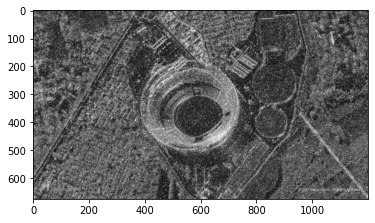

In [93]:
plt.imshow(image_gauss_median, cmap="gray")

In [94]:
import copy

image_sp = copy.deepcopy(image_gray)

image_sp[zeros_pixel] = 0
image_sp[ones_pixel] = 255

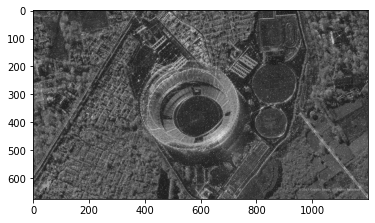

In [95]:
plt.imshow(image_sp, cmap="gray")

In [96]:
mse_sp = mean_squared_error(image_gray, image_sp)
(ssim_sp, diff) = structural_similarity(image_gray, image_sp, full=True)
print(mse_sp, ssim_sp)

387.02924320987654 0.7229272028218258


In [101]:
image_sp_median = cv2.medianBlur(image_sp, 3)

In [102]:
mse_sp_median = mean_squared_error(image_gray, image_sp_median)
(ssim_sp_median, diff) = structural_similarity(image_gray, image_sp_median, full=True)
print(mse_sp_median, ssim_sp_median)

95.94404444444444 0.8160796293211554


# Другие типы фильтров

In [131]:
image_gauss_gauss = cv2.GaussianBlur(image_noise_gauss,(5,5),0)

In [133]:
image_gauss_bilat = cv2.bilateralFilter(image_noise_gauss,9,75,75)

In [139]:
image_gauss_nlm = cv2.fastNlMeansDenoising(image_noise_gauss, h = 20)

In [147]:
import math

def geom(a):
    prod = 1
    for i in range(a.shape[0]):
        prod1 = 1
        for j in range(a.shape[1]):
            prod1 *= a[i,j]
        prod1 = math.pow(prod1, 1.0/9.0)
        prod *= prod1
    return prod

def proc(img, filter):
    img_res = copy.deepcopy(img)
    for i in range(0,img.shape[0] -2):
        for j in range(0,img.shape[1] -2):
            img_res[i:i+3, j:j+3] = filter(img[i:i+3, j:j+3])
    return img_res
    
res = proc(image_noise_gauss, geom)


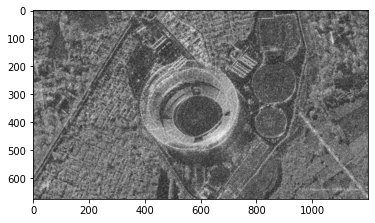

In [148]:
plt.imshow(res, cmap="gray")

In [149]:
mse_geom = mean_squared_error(image_gray, res)
(ssim_geom, diff) = structural_similarity(image_gray, res, full=True)
print(mse_geom, ssim_geom)

1219.7879691358025 0.3984170557811386



# 2D свертка

In [105]:
# averaging filter
kernel_5 = np.ones((5,5),np.float32)/25
image_k5 = cv2.filter2D(image_gray,-1,kernel_5)
# blured_image = cv2.blur(img,(5,5))
image_b5 = cv2.blur(image_gray,(5,5))

In [106]:
mse_kb = mean_squared_error(image_k5, image_b5)
(ssim_kb, diff) = structural_similarity(image_k5, image_b5, full=True)
print(mse_kb, ssim_kb)

0.0 1.0


In [127]:
# Laplasian
kernel_lapl = np.array([[0,-10,0],
                        [-10,40,-10],
                        [0,-10,0]], np.float32)

In [128]:
image_lapl = cv2.filter2D(image_gray,-1,kernel_lapl) 

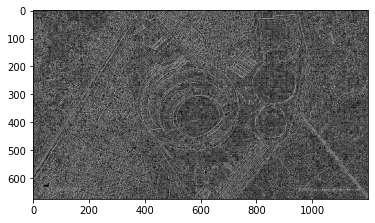

In [129]:
plt.imshow(image_lapl, cmap="gray")

In [ ]:
# ДЗ 2
# Зашумить изображение при помощи шума гаусса, постоянного шума.
# Протестировать медианный фильтр, фильтр гаусса, билатериальный фильтр, фильтр нелокальных средних с различными параметрами.
# Выяснить, какой фильтр показал лучший результат фильтрации шума.

In [8]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

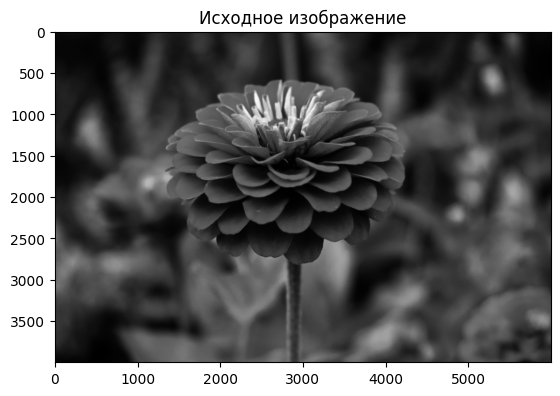

In [20]:
image = cv2.imread('img.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(image_gray, cmap="gray")
plt.title("Исходное изображение")
plt.show()

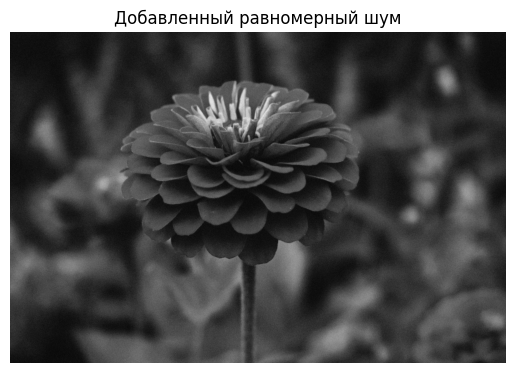

Равномерный шум — MSE, SSIM: 0.011152225540453345 0.10527651333256574


In [26]:
noise_level = 50
uniform_noise = np.random.uniform(-noise_level, noise_level, image_gray.shape).astype(np.int16)

image_noisy_uniform = np.clip(image_gray.astype(np.int16) + uniform_noise, 0, 255).astype(np.uint8)

plt.imshow(image_noisy_uniform, cmap="gray")
plt.title("Добавленный равномерный шум")
plt.axis("off")
plt.show()

image_ref_norm = image_gray.astype(np.float32) / 255.0
image_uniform_norm = image_noisy_uniform.astype(np.float32) / 255.0

mse_uniform = mean_squared_error(image_ref_norm, image_uniform_norm)
ssim_uniform, diff_uniform = structural_similarity(image_ref_norm, image_uniform_norm, full=True, data_range=1.0)

print("Равномерный шум — MSE, SSIM:", mse_uniform, ssim_uniform)

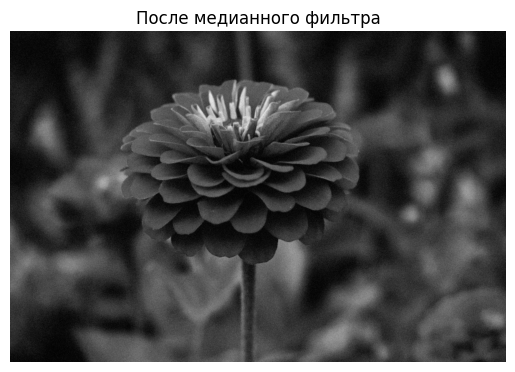

Медианный фильтр — MSE, SSIM: 0.0032323544589873726 0.2776225078071559


In [27]:
denoised_median = cv2.medianBlur(image_noisy_uniform, ksize=3)

plt.imshow(denoised_median, cmap="gray")
plt.title("После медианного фильтра")
plt.axis("off")
plt.show()

image_ref_norm = image_gray.astype(np.float32) / 255.0
image_median_norm = denoised_median.astype(np.float32) / 255.0

mse_median = mean_squared_error(image_ref_norm, image_median_norm)
ssim_median, diff_median = structural_similarity(image_ref_norm, image_median_norm, full=True, data_range=1.0)

print("Медианный фильтр — MSE, SSIM:", mse_median, ssim_median)


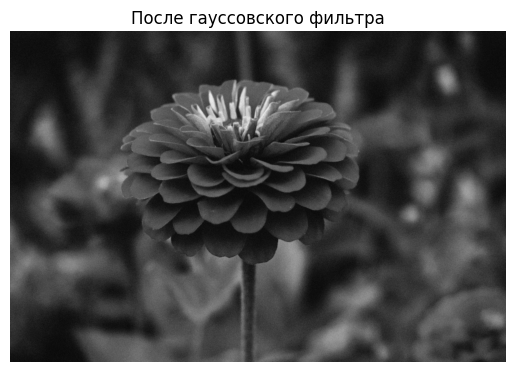

Гауссовский фильтр — MSE, SSIM: 0.0011007431017551407 0.5611653046630493


In [29]:
denoised_gaussian = cv2.GaussianBlur(image_noisy_uniform, (5, 5), sigmaX=0)

plt.imshow(denoised_gaussian, cmap="gray")
plt.title("После гауссовского фильтра")
plt.axis("off")
plt.show()

image_ref_norm = image_gray.astype(np.float32) / 255.0
image_gaussian_norm = denoised_gaussian.astype(np.float32) / 255.0

mse_gaussian = mean_squared_error(image_ref_norm, image_gaussian_norm)
ssim_gaussian, diff_gaussian = structural_similarity(image_ref_norm, image_gaussian_norm, full=True, data_range=1.0)

print("Гауссовский фильтр — MSE, SSIM:", mse_gaussian, ssim_gaussian)

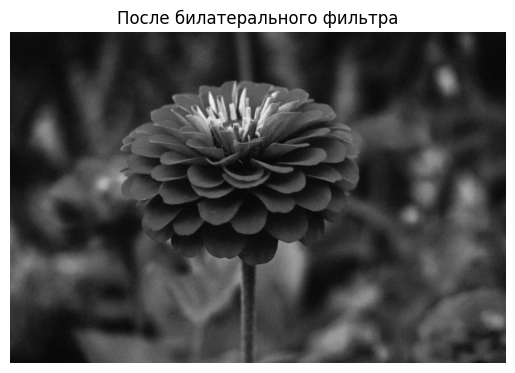

Билатеральный фильтр — MSE, SSIM: 0.0007154162291063901 0.6784030528092602


In [30]:
denoised_bilateral = cv2.bilateralFilter(image_noisy_uniform, d=9, sigmaColor=75, sigmaSpace=75)

plt.imshow(denoised_bilateral, cmap="gray")
plt.title("После билатерального фильтра")
plt.axis("off")
plt.show()

image_ref_norm = image_gray.astype(np.float32) / 255.0
image_bilateral_norm = denoised_bilateral.astype(np.float32) / 255.0

mse_bilateral = mean_squared_error(image_ref_norm, image_bilateral_norm)
ssim_bilateral, diff_bilateral = structural_similarity(image_ref_norm, image_bilateral_norm, full=True, data_range=1.0)

print("Билатеральный фильтр — MSE, SSIM:", mse_bilateral, ssim_bilateral)

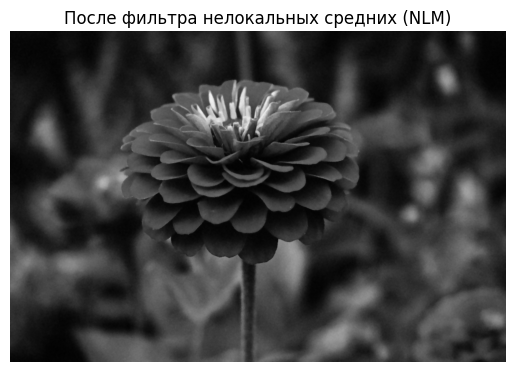

Фильтр NLM — MSE, SSIM: 0.0006350451491640545 0.6932196423026711


In [31]:
denoised_nlm = cv2.fastNlMeansDenoising(image_noisy_uniform, h=20)

plt.imshow(denoised_nlm, cmap="gray")
plt.title("После фильтра нелокальных средних (NLM)")
plt.axis("off")
plt.show()

image_ref_norm = image_gray.astype(np.float32) / 255.0
image_nlm_norm = denoised_nlm.astype(np.float32) / 255.0

mse_nlm = mean_squared_error(image_ref_norm, image_nlm_norm)
ssim_nlm, diff_nlm = structural_similarity(image_ref_norm, image_nlm_norm, full=True, data_range=1.0)

print("Фильтр NLM — MSE, SSIM:", mse_nlm, ssim_nlm)

In [32]:

results = [
    ("Median", ssim_median, mse_median),
    ("Gaussian", ssim_gaussian, mse_gaussian),
    ("Bilateral", ssim_bilateral, mse_bilateral),
    ("NLM", ssim_nlm, mse_nlm)
]

results_sorted = sorted(results, key=lambda x: (-x[1], x[2]))

print("\nРейтинг фильтров (равномерный шум):")
for name, ssim_val, mse_val in results_sorted:
    print(f"{name:10s}  SSIM = {ssim_val:.6f}  |  MSE = {mse_val:.6f}")

best_name, best_ssim, best_mse = results_sorted[0]
print(f"\nЛучший фильтр: {best_name}")
print(f"SSIM = {best_ssim:.6f}, MSE = {best_mse:.6f}")



Рейтинг фильтров (равномерный шум):
NLM         SSIM = 0.693220  |  MSE = 0.000635
Bilateral   SSIM = 0.678403  |  MSE = 0.000715
Gaussian    SSIM = 0.561165  |  MSE = 0.001101
Median      SSIM = 0.277623  |  MSE = 0.003232

Лучший фильтр: NLM
SSIM = 0.693220, MSE = 0.000635
